## DMML - CO2 Emission Assessment

Task: The dataset (CO2 Emission.csv) captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. The goal is to develop a model to estimate the CO2 Emission from cars based upon features.

We will be following this example step-by-step in this assessment:
1. Importing the libraries
1. Loading the data
1. Cleaning the data
1. Analyzing the dataset
1. Dividing the dataset into training and test dataset
1. Training several models and analyzing their performance
1. Selecting a model and evaluating using test dataset

In [1]:
import pandas as pd
import os
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats
import sys

#Importing Data
dir = 'C:\\Users\\varya\\OneDrive\\Desktop\\DMML\\Final'
train = pd.read_csv(os.path.join(dir, 'CO2 Emission.csv'))
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    45511 non-null  object 
 1   year                    45511 non-null  int64  
 2   manufacturer            45511 non-null  object 
 3   model                   45511 non-null  object 
 4   description             45511 non-null  object 
 5   euro_standard           45511 non-null  int64  
 6   tax_band                7837 non-null   object 
 7   transmission            45501 non-null  object 
 8   transmission_type       45170 non-null  object 
 9   engine_capacity         45504 non-null  float64
 10  fuel_type               45511 non-null  object 
 11  urban_metric            45498 non-null  float64
 12  extra_urban_metric      45498 non-null  float64
 13  combined_metric         45504 non-null  float64
 14  urban_imperial          45498 non-null

C:\Users\varya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
(train.isnull().sum()/len(train))*100

file                       0.000000
year                       0.000000
manufacturer               0.000000
model                      0.000000
description                0.000000
euro_standard              0.000000
tax_band                  82.779987
transmission               0.021973
transmission_type          0.749269
engine_capacity            0.015381
fuel_type                  0.000000
urban_metric               0.028565
extra_urban_metric         0.028565
combined_metric            0.015381
urban_imperial             0.028565
extra_urban_imperial       0.028565
combined_imperial          0.015381
noise_level                0.019775
co2                        0.000000
thc_emissions             49.045286
co_emissions               0.700929
nox_emissions             11.779570
thc_nox_emissions         88.068819
particulates_emissions    67.478192
fuel_cost_12000_miles     27.191228
fuel_cost_6000_miles      73.193294
standard_12_months        92.272198
standard_6_months         93

In [3]:
# Dropping columns as they have high number of missing values
data=train.drop(['date_of_change','thc_nox_emissions','first_year_6_months','file','first_year_12_months','standard_6_months','standard_12_months','fuel_cost_6000_miles','tax_band'], axis=1)

In [4]:
data.head()

,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,particulates_emissions,fuel_cost_12000_miles
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,11.1,...,25.4,43.5,34.4,74.0,195,NaN,980.0,NaN,NaN,NaN
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,11.5,...,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,M5,Manual,1970.0,Petrol,12.4,...,22.8,42.8,32.1,74.0,210,NaN,1103.0,NaN,NaN,NaN
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,11.3,...,25.0,42.8,34.0,73.0,195,NaN,980.0,NaN,NaN,NaN
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,11.5,...,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN


In [5]:
(data.isnull().sum()/len(train))*100

year                       0.000000
manufacturer               0.000000
model                      0.000000
description                0.000000
euro_standard              0.000000
transmission               0.021973
transmission_type          0.749269
engine_capacity            0.015381
fuel_type                  0.000000
urban_metric               0.028565
extra_urban_metric         0.028565
combined_metric            0.015381
urban_imperial             0.028565
extra_urban_imperial       0.028565
combined_imperial          0.015381
noise_level                0.019775
co2                        0.000000
thc_emissions             49.045286
co_emissions               0.700929
nox_emissions             11.779570
particulates_emissions    67.478192
fuel_cost_12000_miles     27.191228
dtype: float64

In [6]:
#Filling the missing values for continuous variables with median
data['fuel_cost_12000_miles']  =data['fuel_cost_12000_miles'].fillna(data['fuel_cost_12000_miles'].median())
data['particulates_emissions']  =data['particulates_emissions'].fillna(data['particulates_emissions'].median())
data['nox_emissions'] =data['nox_emissions'].fillna(data['nox_emissions'].median())
data['co_emissions']=data['co_emissions'].fillna(data['co_emissions'].median())

In [7]:
data['thc_emissions']=data['thc_emissions'].fillna(data['thc_emissions'].median())

In [8]:
# Ropping rows with null values.
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45158 entries, 0 to 45177
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    45158 non-null  int64  
 1   manufacturer            45158 non-null  object 
 2   model                   45158 non-null  object 
 3   description             45158 non-null  object 
 4   euro_standard           45158 non-null  int64  
 5   transmission            45158 non-null  object 
 6   transmission_type       45158 non-null  object 
 7   engine_capacity         45158 non-null  float64
 8   fuel_type               45158 non-null  object 
 9   urban_metric            45158 non-null  float64
 10  extra_urban_metric      45158 non-null  float64
 11  combined_metric         45158 non-null  float64
 12  urban_imperial          45158 non-null  float64
 13  extra_urban_imperial    45158 non-null  float64
 14  combined_imperial       45158 non-null

In [10]:
data['manufacturer'].unique()

array(['Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Cadillac',
       'Chevrolet', 'Chrysler Jeep', 'Citroen', 'Daewoo Cars', 'Daihatsu',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar Cars', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lotus', 'LTI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Metrocab',
       'Micro Compact Car', 'Mitsubishi', 'Nissan', 'Perodua', 'Peugeot',
       'Porsche', 'Proton', 'Renault', 'Rolls-Royce',
       'Rover Group Limited', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Toyota', 'Vauxhall', 'Volkswagen', 'Volvo',
       'MG Rover Group', 'Mini', 'Morgan Motor Company', 'Bentley Motors',
       'Smart', 'SsangYong', 'Corvette', 'Dodge', 'Hummer', 'Abarth',
       'Infiniti', 'MG Motors Uk', 'McLaren', 'Dacia', 'MG Motors UK'],
      dtype=object)

In [11]:
data['transmission'].unique()

array(['M5', 'SAT5', 'M6', 'A4', 'A5', 'QM6', 'QA5', 'QM5', 'QM', 'QA',
       'FA5', 'FM5', 'FA4', 'A3', 'CVT', 'A', '4SS', 'M4', 'SAT 5', '5MT',
       '4AT', 'M5x2', 'M5/s', 'SM6', 'A6', 'MT', 'AT', 'M5N', 'A4L',
       'M5NE', 'A4NE', '3AT', '5MTx2', '4ATx2', 'A4x2', 'M', 'AV', 'QA6',
       'SS5', 'S/A6', 'M3', 'MTA', 'SAT6', 'Hybrid', 'QD6', 'D6',
       'A/SAT5', 'ASM', 'A5x2', 'M6/S6', 'A7', 'Multi5', 'E-CVT',
       'Electric', 'm5', 'SMG 7', '6MT', '5A/Tx2', 'M6x2', '5AT', '6AMT',
       '5 AMT', 'MTA5', 'i-SHIFT', 'A8', 'DCT7', 'M6-AWD', 'S6', 'A6x2',
       'D7', 'M7', 'A5-AWD', 'MultiDrive', 'MTA6', 'QD7', 'A6-AWD', 'DM6',
       'MCVT', 'Semi-Auto', 'AM5', 'Multi6', 'MultiDriv', 'DCT6', 'ET5',
       'QA8', '6AT', 'AMT6', 'AMT5', '7SP. SSG', 'ASM  ', 'M8', 'A8-AWD'],
      dtype=object)

In [12]:
# Transforming categorical variables values
le = LabelEncoder()
data['manufacturer']  = le.fit_transform(data['manufacturer'])
data['transmission']  = le.fit_transform(data['transmission'])
data['description']  = le.fit_transform(data['description'])
data['model']  = le.fit_transform(data['model'])
data['transmission_type']    = le.fit_transform(data['transmission_type'])
data['fuel_type']  = le.fit_transform(data['fuel_type'])

In [13]:
data.head()

,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,particulates_emissions,fuel_cost_12000_miles
0,2000,1,28,3061,2,52,1,1598.0,5,11.1,...,25.4,43.5,34.4,74.0,195,55.0,980.0,56.0,0.073,1463.0
1,2000,1,28,4314,2,52,1,1747.0,5,11.5,...,24.6,42.8,33.6,74.0,200,55.0,1105.0,56.0,0.073,1463.0
2,2000,1,28,12187,2,52,1,1970.0,5,12.4,...,22.8,42.8,32.1,74.0,210,55.0,1103.0,56.0,0.073,1463.0
3,2000,1,29,3061,2,52,1,1598.0,5,11.3,...,25.0,42.8,34.0,73.0,195,55.0,980.0,56.0,0.073,1463.0
4,2000,1,29,4314,2,52,1,1747.0,5,11.5,...,24.6,42.8,33.6,74.0,200,55.0,1105.0,56.0,0.073,1463.0


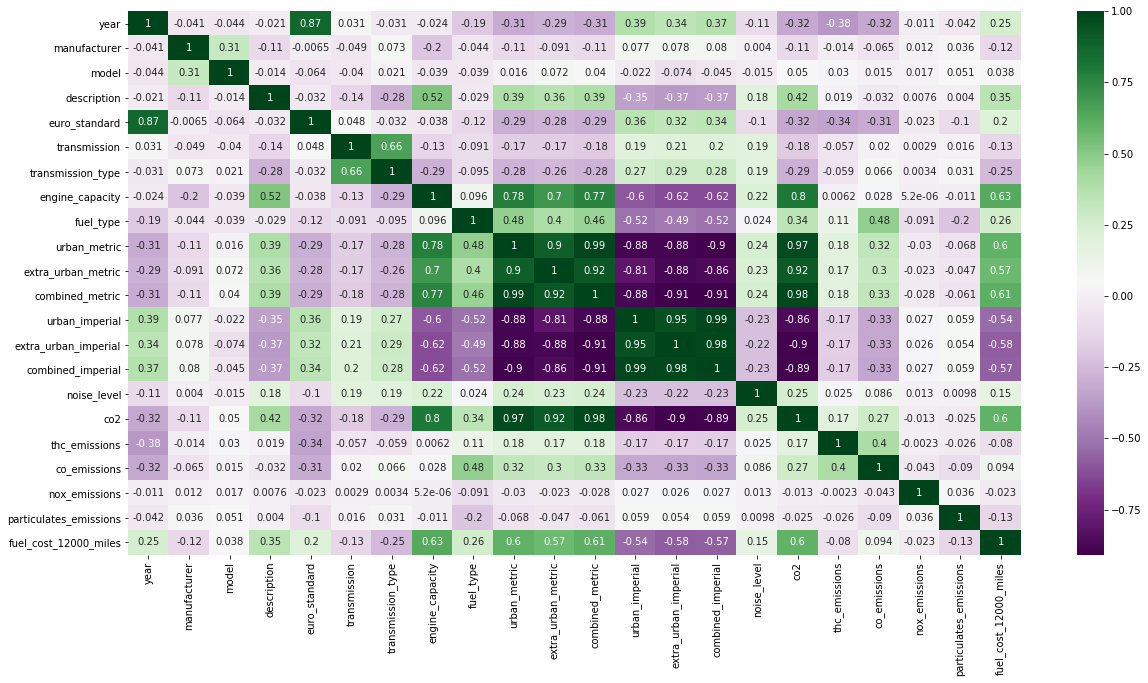

In [15]:
# Plotting Correlation Matrix to check highly dependant variables.
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True, cmap = "PRGn")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [16]:
# Dropping Highy correlated columns
data1=data.drop(['extra_urban_metric','urban_metric','urban_imperial','year','combined_metric','combined_imperial'], axis=1)

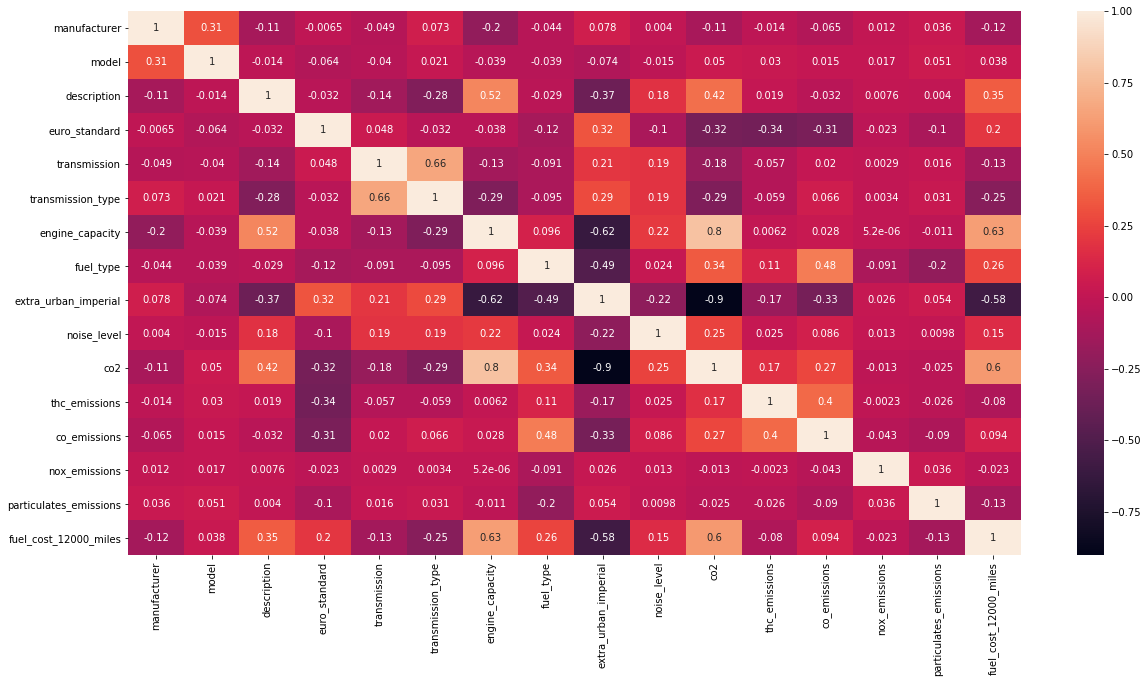

In [17]:
corrMatrix = data1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [18]:
# Checking if there is any duplicate record for the same song
data_no_dupl = data1.drop_duplicates()

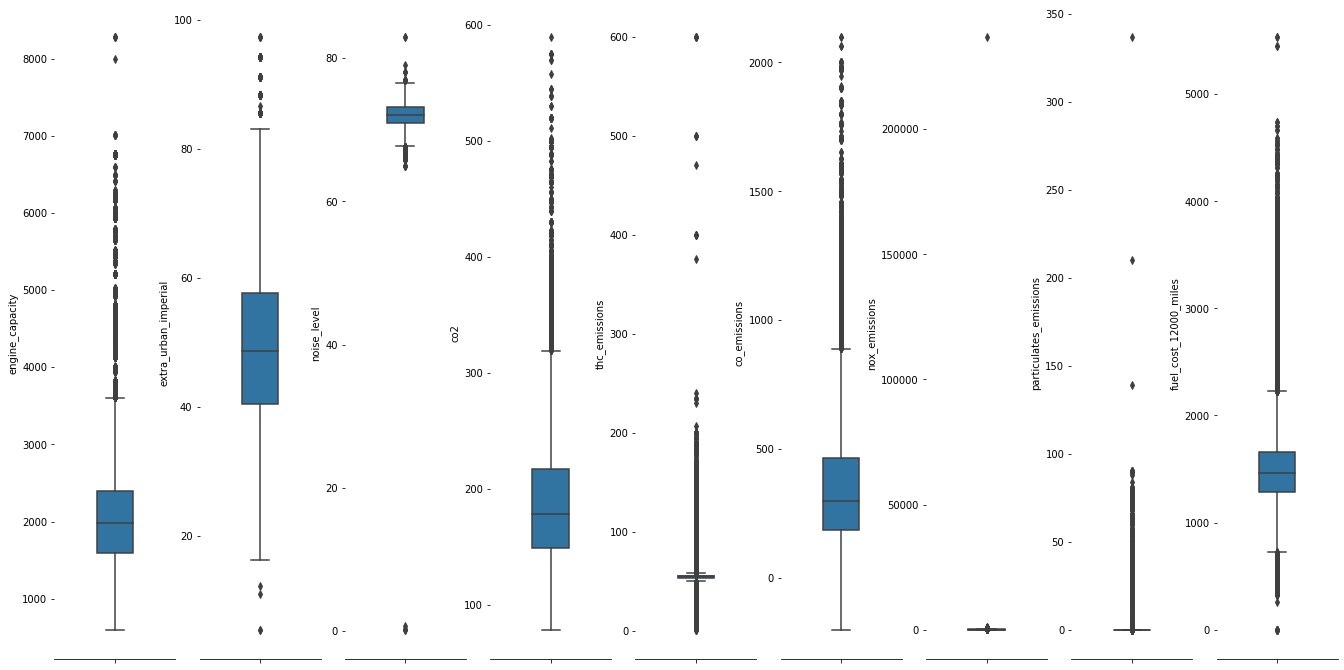

In [19]:
# Lets plot Boxplot for each column
# set up the axes of subplot:
f,ax = plt.subplots(1,9, figsize=(23,12))
sn.despine(left=True)
cols1=['engine_capacity','extra_urban_imperial','noise_level','co2','thc_emissions','co_emissions','nox_emissions',
      'particulates_emissions','fuel_cost_12000_miles']
sn.boxplot(cols1[0],data=data_no_dupl,orient='v',ax=ax[0],width=0.3)
sn.boxplot(cols1[1],data=data_no_dupl,orient='v',ax=ax[1],width=0.3)
sn.boxplot(cols1[2],data=data_no_dupl,orient='v',ax=ax[2],width=0.3)
sn.boxplot(cols1[3],data=data_no_dupl,orient='v',ax=ax[3],width=0.3)
sn.boxplot(cols1[4],data=data_no_dupl,orient='v',ax=ax[4],width=0.3)
sn.boxplot(cols1[5],data=data_no_dupl,orient='v',ax=ax[5],width=0.3)
sn.boxplot(cols1[6],data=data_no_dupl,orient='v',ax=ax[6],width=0.3)
sn.boxplot(cols1[7],data=data_no_dupl,orient='v',ax=ax[7],width=0.3)
sn.boxplot(cols1[8],data=data_no_dupl,orient='v',ax=ax[8],width=0.3)
#sn.boxplot(cols1[9],data=data_no_dupl,orient='v',ax=ax[9],width=0.3)
plt.show()

In [20]:
# Treating Outliers for engine_capacity:
Q1 = data_no_dupl.engine_capacity.quantile(0.05)
Q3 = data_no_dupl.engine_capacity.quantile(0.95)

IQR = Q3 - Q1
data_no_dupl = data_no_dupl[(data_no_dupl.engine_capacity>=Q1 - 1.5*IQR)&(data_no_dupl.engine_capacity<=Q3 + 1.5*IQR)]

In [21]:
# Treating Outliers for noise_level:
Q1 = data_no_dupl.noise_level.quantile(0.05)
Q3 = data_no_dupl.noise_level.quantile(0.95)

IQR = Q3 - Q1
data_no_dupl = data_no_dupl[(data_no_dupl.noise_level>=Q1 - 1.5*IQR)&(data_no_dupl.noise_level<=Q3 + 1.5*IQR)]

In [22]:
# Treating Outliers for co2:
Q1 = data_no_dupl.co2.quantile(0.05)
Q3 = data_no_dupl.co2.quantile(0.95)

IQR = Q3 - Q1
data_no_dupl = data_no_dupl[(data_no_dupl.co2>=Q1 - 1.5*IQR)&(data_no_dupl.co2<=Q3 + 1.5*IQR)]

In [23]:
# Treating Outliers for thc_emissions:
Q1 = data_no_dupl.thc_emissions.quantile(0.05)
Q3 = data_no_dupl.thc_emissions.quantile(0.95)

IQR = Q3 - Q1
data_no_dupl = data_no_dupl[(data_no_dupl.thc_emissions>=Q1 - 1.5*IQR)&(data_no_dupl.thc_emissions<=Q3 + 1.5*IQR)]

In [24]:
# Treating Outliers for nox_emissions:
Q1 = data_no_dupl.nox_emissions.quantile(0.05)
Q3 = data_no_dupl.nox_emissions.quantile(0.95)

IQR = Q3 - Q1
data_no_dupl = data_no_dupl[(data_no_dupl.nox_emissions>=Q1 - 1.5*IQR)&(data_no_dupl.nox_emissions<=Q3 + 1.5*IQR)]

In [25]:
# Treating Outliers for particulates_emissions:
Q1 = data_no_dupl.particulates_emissions.quantile(0.05)
Q3 = data_no_dupl.particulates_emissions.quantile(0.95)

IQR = Q3 - Q1
data_no_dupl = data_no_dupl[(data_no_dupl.particulates_emissions>=Q1 - 1.5*IQR)&(data_no_dupl.particulates_emissions<=Q3 + 1.5*IQR)]

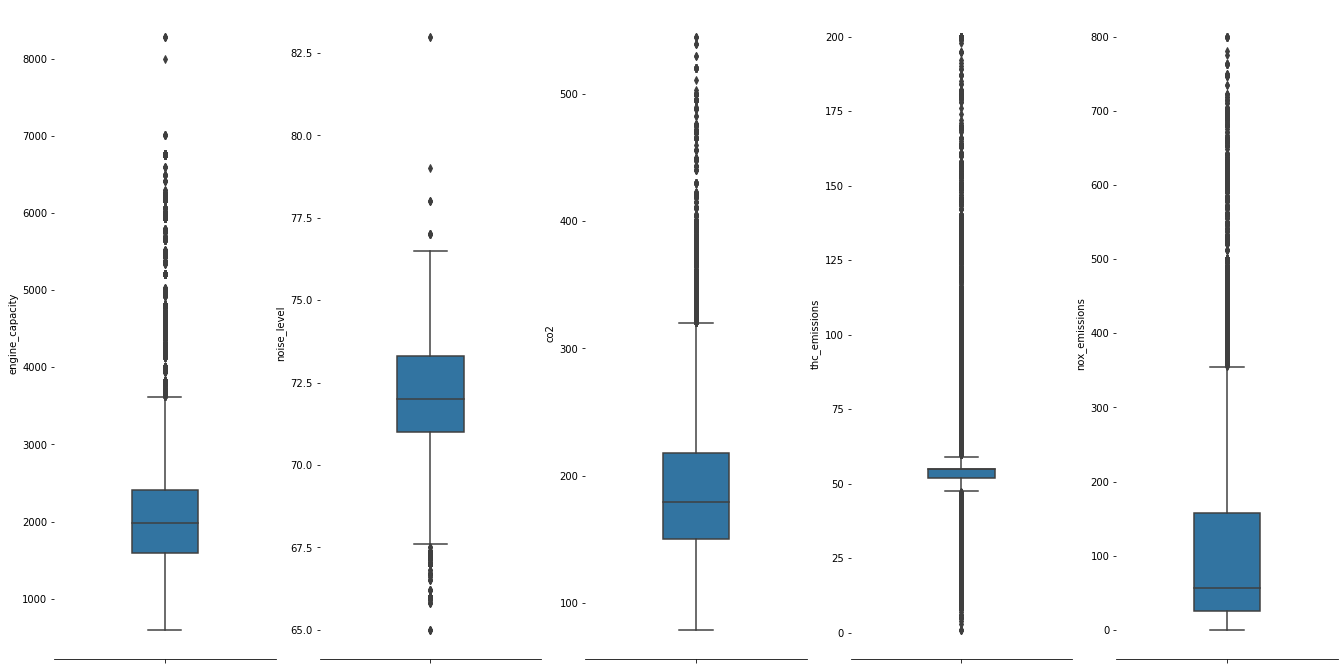

In [26]:
# Lets plot Boxplot for each column
# set up the axes of subplot:
f,ax = plt.subplots(1,5, figsize=(23,12))
sn.despine(left=True)
cols1=['engine_capacity','noise_level','co2','thc_emissions','nox_emissions','particulates_emissions']
sn.boxplot(cols1[0],data=data_no_dupl,orient='v',ax=ax[0],width=0.3)
sn.boxplot(cols1[1],data=data_no_dupl,orient='v',ax=ax[1],width=0.3)
sn.boxplot(cols1[2],data=data_no_dupl,orient='v',ax=ax[2],width=0.3)
sn.boxplot(cols1[3],data=data_no_dupl,orient='v',ax=ax[3],width=0.3)
sn.boxplot(cols1[4],data=data_no_dupl,orient='v',ax=ax[4],width=0.3)

plt.show()

In [27]:
# Also treating outliers by z score
print('Shape of DataFrame Before Removing Outliers', data_no_dupl.shape )
data_no_dupl=data_no_dupl[(np.abs(stats.zscore(data_no_dupl)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', data_no_dupl.shape )

Shape of DataFrame Before Removing Outliers (40951, 16)
Shape of DataFrame After Removing Outliers (36367, 16)


In [28]:
data_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36367 entries, 0 to 45175
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer            36367 non-null  int32  
 1   model                   36367 non-null  int32  
 2   description             36367 non-null  int32  
 3   euro_standard           36367 non-null  int64  
 4   transmission            36367 non-null  int32  
 5   transmission_type       36367 non-null  int32  
 6   engine_capacity         36367 non-null  float64
 7   fuel_type               36367 non-null  int32  
 8   extra_urban_imperial    36367 non-null  float64
 9   noise_level             36367 non-null  float64
 10  co2                     36367 non-null  int64  
 11  thc_emissions           36367 non-null  float64
 12  co_emissions            36367 non-null  float64
 13  nox_emissions           36367 non-null  float64
 14  particulates_emissions  36367 non-null

In [29]:
data_no_dupl['co2'].mean()

181.6166304616823

In [30]:
X  =  data_no_dupl[['manufacturer','euro_standard','transmission','transmission_type','fuel_type','extra_urban_imperial','noise_level','thc_emissions','co_emissions','nox_emissions','particulates_emissions','fuel_cost_12000_miles']]
y = data_no_dupl[['co2']]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29093, 12) (7274, 12) (29093, 1) (7274, 1)


## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
ylin_pred = lin.predict(X_test)

In [33]:
from sklearn import metrics

print('Mean absolute error:',metrics.mean_absolute_error(y_test, ylin_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, ylin_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ylin_pred)))
print('R2 score:',metrics.r2_score(y_test, ylin_pred))

Mean absolute error: 11.053990887252672
Mean Squared Error: 228.03640460918743
Root Mean Squared Error: 15.100874299496285
R2 score: 0.8879992044754237


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators = 1)
classifier.fit(X_train, y_train.values.ravel())
#.values will give the values in an array and .ravel will convert that array shape to (n, ))
yRand_pred = classifier.predict(X_test)

In [35]:
print('Mean absolute error:',metrics.mean_absolute_error(y_test, yRand_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, yRand_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yRand_pred)))
print('R2 score:',metrics.r2_score(y_test, yRand_pred))

Mean absolute error: 2.7612438954135405
Mean Squared Error: 47.63057734206321
Root Mean Squared Error: 6.901490950661546
R2 score: 0.9766060925107612


## Decision Tree

In [36]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
yDec_pred = clf.predict(X_test)

In [37]:
print('Mean absolute error:',metrics.mean_absolute_error(y_test, yDec_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, yDec_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yDec_pred)))
print('R2 score:',metrics.r2_score(y_test, yDec_pred))

Mean absolute error: 1.9029267100479639
Mean Squared Error: 31.068720098982677
Root Mean Squared Error: 5.573932193611856
R2 score: 0.9847405006539195
